<a href="https://colab.research.google.com/github/sanchit2843/dlworkshop/blob/master/lesson_5_Image_classification_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is code for the image classification [blog](https://).  

# Downloading dataset from kaggle

In [1]:
#Upload kaggle.json file which can be downloaded from kaggle websites my account section
import os
from google.colab import files
files.upload()
os.system("mkdir -p ~/.kaggle")
os.system("cp kaggle.json ~/.kaggle/")
os.system("chmod 600 ~/.kaggle/kaggle.json")

Saving kaggle.json to kaggle.json


0

In [2]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 73.5MB/s]
 95% 257M/271M [00:05<00:00, 41.7MB/s]
100% 271M/271M [00:05<00:00, 48.0MB/s]
 98% 532M/543M [00:06<00:00, 115MB/s]
100% 543M/543M [00:06<00:00, 84.2MB/s]


In [0]:
!unzip train.zip

# Visualizing Data

In [0]:
import matplotlib.pyplot as plt
import cv2
dog_img = cv2.imread('./train/dog.6281.jpg')
cat_img = cv2.imread('./train/cat.6361.jpg')
files.download('./train/cat.6361.jpg')

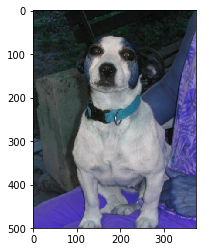

In [5]:
plt.imshow(dog_img)

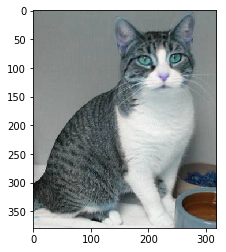

In [6]:
plt.imshow(cat_img)

# Creating Dataloader

In [0]:
#Creating list with labels
import pandas as pd
filenames = os.listdir('./train')
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append('dog')
  else:
    categories.append('cat')
        
    
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size = 0.2)

In [29]:
#Class for image data generator
from keras.preprocessing.image import ImageDataGenerator

#We need to normalize image
datagen = ImageDataGenerator(rescale=1./255)
traingenerator = datagen.flow_from_dataframe( train_df , './train',x_col = 'filename' , y_col = 'category', target_size = (224,224) ,class_mode='categorical', batch_size = 32)
testgenerator = datagen.flow_from_dataframe( test_df , './train',x_col = 'filename' , y_col = 'category', target_size = (224,224) ,class_mode='categorical', batch_size = 32)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


# Model

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 49, 49, 128)       204928    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 20, 20, 256)       819456    
__________

In [32]:
history = model.fit_generator(
    traingenerator, 
    epochs=20,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator)
)

Epoch 1/20
625/625 [==============================] - 114s 182ms/step - loss: 0.7580 - acc: 0.5399 - val_loss: 0.6757 - val_acc: 0.5898
Epoch 2/20
625/625 [==============================] - 112s 179ms/step - loss: 0.6373 - acc: 0.6366 - val_loss: 0.6183 - val_acc: 0.6516
Epoch 3/20
625/625 [==============================] - 111s 178ms/step - loss: 0.5499 - acc: 0.7283 - val_loss: 0.5589 - val_acc: 0.7110
Epoch 4/20
625/625 [==============================] - 111s 178ms/step - loss: 0.4665 - acc: 0.7802 - val_loss: 0.4535 - val_acc: 0.7905
Epoch 5/20
625/625 [==============================] - 112s 179ms/step - loss: 0.3810 - acc: 0.8350 - val_loss: 0.4036 - val_acc: 0.8146
Epoch 6/20
625/625 [==============================] - 111s 178ms/step - loss: 0.3102 - acc: 0.8659 - val_loss: 0.3044 - val_acc: 0.8726
Epoch 7/20
625/625 [==============================] - 111s 178ms/step - loss: 0.2538 - acc: 0.8931 - val_loss: 0.2989 - val_acc: 0.8752
Epoch 8/20
625/625 [============================

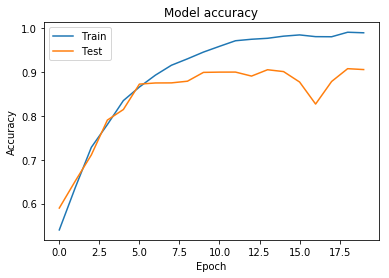

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

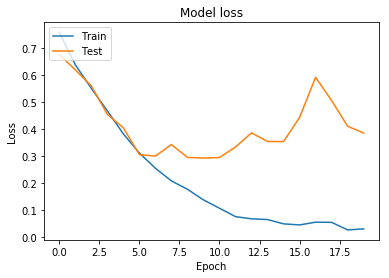

In [36]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [67]:
# Encoder dictionary created by keras
traingenerator.class_indices


{'cat': 0, 'dog': 1}

In [68]:
labels = (traingenerator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cat', 1: 'dog'}


In [0]:
import numpy as np

def img_show(image):
  b,g,r = cv2.split(image)
  image = cv2.merge((r,g,b))
  plt.imshow(image)
  plt.show()
  return image

def test(model,image_path):
  img = cv2.imread(image_path)
  img = img_show(img)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,(1,224,224,3))
  img = img/255.0
  prediction = model.predict(img)
  prediction = np.argmax(prediction)
  labels = (traingenerator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  return labels[prediction]

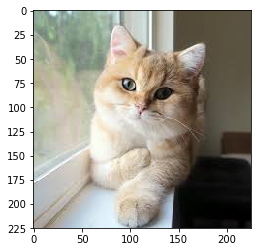

predicted label is: cat


In [65]:
print('predicted label is:' , test(model,'/content/download.jfif'))